# Web scraping: headers, the networks tab and parsing an API URL
## Helpful links and resources
- [urllib](https://docs.python.org/3/library/urllib.parse.html#) is a Python library that will pick apart URLs
- [Sessions object - request library](https://docs.python-requests.org/en/master/user/advanced/#session-objects)

In [41]:
import requests
import pandas as pd
import html
from IPython.display import clear_output
from urllib.parse import urlparse

In [5]:
def my_api(url,mysearch,count):
    parsed_url = urlparse(url)
    endpoint = parsed_url[0] + '://' + parsed_url[1] + parsed_url[2]
    params = {}
    for parameter in parsed_url[4].split('&'):
        key_value = parameter.split('=')
        params[key_value[0]] = key_value[1]
    params['count'] = count
    params['offset'] = 0
    params['keyword'] = mysearch
    #print(params)
    df = pd.DataFrame()
    while True:
            print('Last offset:', params['offset'])
            results = requests.get(endpoint, params=params)
            products = results.json()['data']['search']['products']
            if len(products) == 0:
                print('No products found. Exiting')
                break
            #print(len(products),'items downloaded.')
            print('------')
            clear_output()
            df = df.append(pd.json_normalize(products))
            params['offset'] = int(params['offset']) + count
    df = df.reset_index()
    return df

## The networks tab
### Static data files
[Covid cases in the US - New York Times](https://www.nytimes.com/interactive/2021/us/covid-cases.html)

In [ ]:
# get static data file
covid_cases_r = requests.get('https://static01.nyt.com/newsgraphics/2021/coronavirus-tracking/data/pages/usa/data.json')

In [ ]:
covid_cases = covid_cases_r.json()

In [ ]:
#covid_cases

### "Secret" APIs
Shopping websites are good candidates for secret APIs, such as [Target](www.target.com)

#### Target's Search API

In [38]:
# Use the web inspector to grab a JSON request
url = 'https://redsky.target.com/redsky_aggregations/v1/web/plp_search_v1?key=ff457966e64d5e877fdbad070f276d18ecec4a01&channel=WEB&count=24&default_purchasability_filter=false&include_sponsored=true&keyword=soccer&offset=0&page=%2Fs%2Fsoccer&platform=desktop&pricing_store_id=3991&visitor_id=017A79011A5902018B8E75524DE87692'

df = my_api(url,'china',28)

Last offset: 336
No products found. Exiting


In [36]:
# df.head(10)
# df['item.product_description.title'].unique()
# df.info()
# df

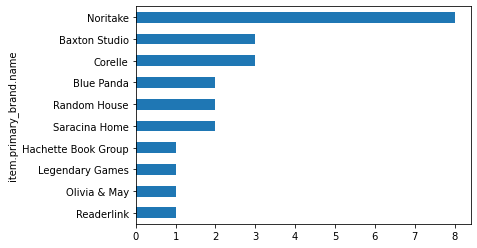

In [39]:
columns = ['item.primary_brand.name','price.current_retail']

df[columns].groupby(by='item.primary_brand.name').size()\
.sort_values(ascending=False)[:10].plot(kind='barh').invert_yaxis()

Last offset: 1036
No products found. Exiting


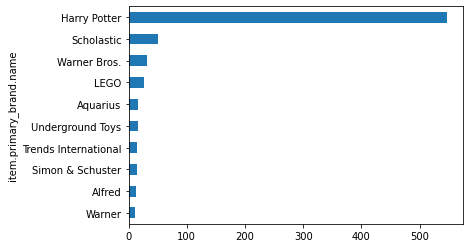

In [40]:
my_api(url,'harry potter',28)[columns].groupby(by='item.primary_brand.name').size()\
.sort_values(ascending=False)[:10].plot(kind='barh').invert_yaxis()

#### Target's aggregation API

In [ ]:
# Unfinished
# target_list = 'https://redsky.target.com/redsky_aggregations/v1/web/plp_fulfillment_v1?key=ff457966e64d5e877fdbad070f276d18ecec4a01&tcins=81107269%2C81068829%2C14135567%2C81068792%2C82079503%2C81829962%2C81068790%2C81506339%2C80935950%2C81107259%2C81068797%2C11069188%2C81506334%2C81107271%2C81068773%2C81180792%2C81107267%2C81068789%2C81068796%2C81506336%2C81107268%2C81068821%2C81564691%2C81953908%2C81068815%2C81068825%2C81068787%2C81564688&store_id=2850&zip=11201&state=NY&latitude=40.690&longitude=-74.000&scheduled_delivery_store_id=2850'
# generate_api(target_list)

In [ ]:
# params['state'] = 'GA'

# df = pd.DataFrame()
# results = requests.get(generate_api(url)[0], params=generate_api(url)[1])
# products = results.json()['data']['search']['products']
# df = df.append(pd.json_normalize(products))
# df

## Using sessions to login
### Accessing password-protected pages
[Sessions object - request library](https://docs.python-requests.org/en/master/user/advanced/#session-objects)

In [ ]:
# open up a session so that your login credentials are saved

In [ ]:
# load in config file with passwords

In [ ]:
# check the website for the login parameters

In [ ]:
# post the payload to the site to login with the correct log in endpoint

In [ ]:
# check credentials to see if successful

In [ ]:
# look at an example page to get you started with a query

In [ ]:
# create a new post object from the example

In [ ]:
# post request for the data

In [ ]:
# check to see what is returned